In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
uber = pd.read_csv('/content/uber.csv')

uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
uber.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11768 non-null  int64  
 1   key                11768 non-null  object 
 2   fare_amount        11768 non-null  float64
 3   pickup_datetime    11768 non-null  object 
 4   pickup_longitude   11768 non-null  float64
 5   pickup_latitude    11768 non-null  float64
 6   dropoff_longitude  11768 non-null  float64
 7   dropoff_latitude   11767 non-null  float64
 8   passenger_count    11767 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 827.6+ KB


In [ ]:
uber.isnull().sum()


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     1
passenger_count      1
dtype: int64

In [ ]:
uber_2 = uber.drop(['Unnamed: 0','key'],axis=1) 
uber_2.dropna(axis=0,inplace=True)

In [ ]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [ ]:
uber_2['Distance']= haversine(uber_2['pickup_longitude'],uber_2['dropoff_longitude'],
                             uber_2['pickup_latitude'],uber_2['dropoff_latitude'])

uber_2['Distance'] = uber_2['Distance'].astype(float).round(2)    # Round-off Optional


In [ ]:
uber_2.head()



,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0,4.48


Text(0, 0.5, 'fare_amount')

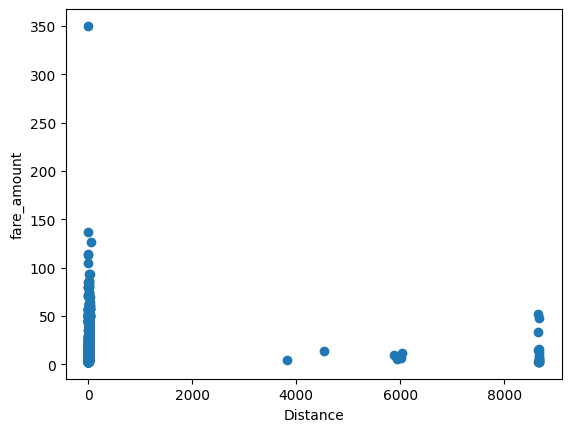

In [ ]:
plt.scatter(uber_2['Distance'], uber_2['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [ ]:
uber_2.drop(uber_2[uber_2['Distance'] > 60].index, inplace = True)
uber_2.drop(uber_2[uber_2['Distance'] == 0].index, inplace = True)
uber_2.drop(uber_2[uber_2['fare_amount'] == 0].index, inplace = True)
uber_2.drop(uber_2[uber_2['fare_amount'] < 0].index, inplace = True)

In [ ]:
uber_2.drop(uber_2[(uber_2['fare_amount']>100) & (uber_2['Distance']<1)].index, inplace = True )
uber_2.drop(uber_2[(uber_2['fare_amount']<100) & (uber_2['Distance']>100)].index, inplace = True )

In [ ]:
uber_2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0,4.48


In [ ]:
uber_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11414 entries, 0 to 11766
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        11414 non-null  float64
 1   pickup_datetime    11414 non-null  object 
 2   pickup_longitude   11414 non-null  float64
 3   pickup_latitude    11414 non-null  float64
 4   dropoff_longitude  11414 non-null  float64
 5   dropoff_latitude   11414 non-null  float64
 6   passenger_count    11414 non-null  float64
 7   Distance           11414 non-null  float64
dtypes: float64(7), object(1)
memory usage: 802.5+ KB


Text(0, 0.5, 'fare_amount')

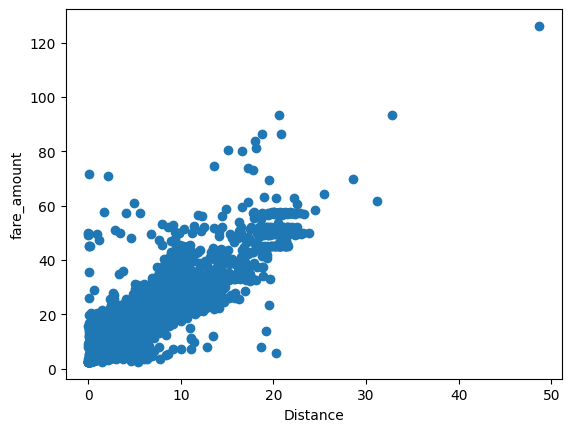

In [ ]:
plt.scatter(uber_2['Distance'], uber_2['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [ ]:
uber_2['pickup_datetime'] = pd.to_datetime(uber_2['pickup_datetime'])

uber_2['Year'] = uber_2['pickup_datetime'].apply(lambda time: time.year)
uber_2['Month'] = uber_2['pickup_datetime'].apply(lambda time: time.month)
uber_2['Day'] = uber_2['pickup_datetime'].apply(lambda time: time.day)
uber_2['Day of Week'] = uber_2['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_2['DayofWeek_num'] = uber_2['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_2['Hour'] = uber_2['pickup_datetime'].apply(lambda time: time.hour)
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
uber_2['Day of Week'] = uber_2['Day of Week'].map(day_map)

uber_2['counter'] = 1


In [ ]:
uber_2['pickup'] = uber_2['pickup_latitude'].astype(str) + "," + uber_2['pickup_longitude'].astype(str)   
uber_2['drop off'] = uber_2['dropoff_latitude'].astype(str) + "," + uber_2['dropoff_longitude'].astype(str)

In [ ]:
uber_2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day of Week,DayofWeek_num,Hour,counter,pickup,drop off
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,1.68,2015,5,7,Thu,3,19,1,"40.73835373,-73.99981689","40.72321701,-73.99951172"
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.46,2009,7,17,Fri,4,20,1,"40.728225,-73.994355","40.750325,-73.99471"
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,5.04,2009,8,24,Mon,0,21,1,"40.74077,-74.005043","40.772647,-73.962565"
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,1.66,2009,6,26,Fri,4,8,1,"40.790844,-73.976124","40.803349,-73.965316"
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,4.48,2014,8,28,Thu,3,17,1,"40.744085,-73.925023","40.761247,-73.973082"


Average trips a year: 
[2009, 2010, 2011, 2012, 2013, 2014, 2015] [1764, 1648, 1835, 1880, 1747, 1712, 828]


<BarContainer object of 7 artists>

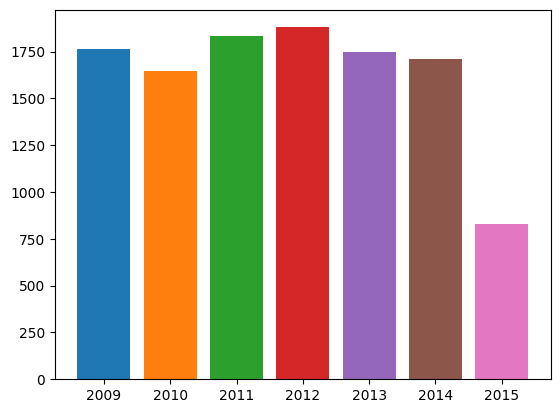

In [ ]:
no_of_trips = []
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(2009, 2016):
    x = uber_2.loc[uber_2['Year'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips a year: ")
print(year, no_of_trips)

plt.bar(year, no_of_trips, color=colors)

Average trips a Month: 
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] [995, 987, 1105, 1073, 1076, 1040, 827, 799, 904, 903, 823, 882]


<BarContainer object of 12 artists>

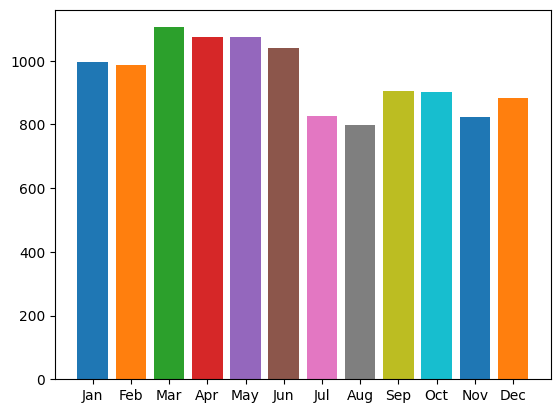

In [ ]:
no_of_trips = []
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(1, 13):
    x = uber_2.loc[uber_2['Month'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips a Month: ")
print(month, no_of_trips)

plt.bar(month, no_of_trips, color=colors)

Average trips by Days: 
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] [1388, 1644, 1674, 1708, 1750, 1792, 1458]


<BarContainer object of 7 artists>

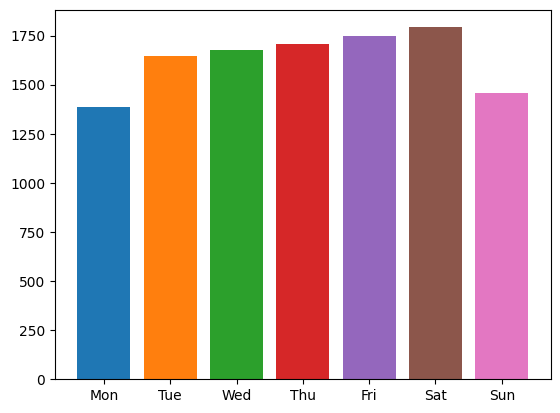

In [ ]:
no_of_trips = []
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(0, 7):
    x = uber_2.loc[uber_2['DayofWeek_num'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips by Days: ")
print(day, no_of_trips)

plt.bar(day, no_of_trips, color=colors)

<Axes: title={'center': 'No of trips vs Months'}, xlabel='January, 2009 - June, 2015', ylabel='No of Trips'>

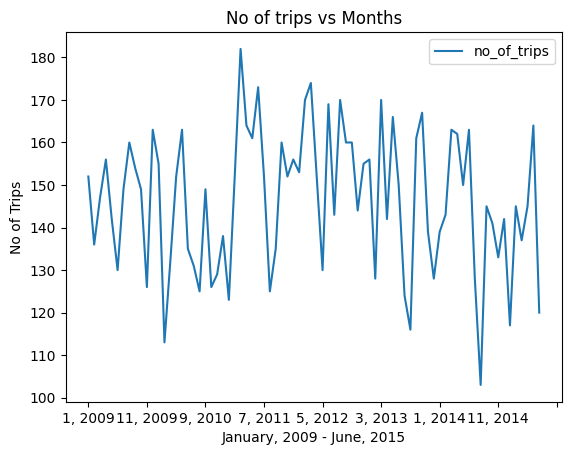

In [ ]:
year_vs_trips = uber_2.groupby(['Year','Month']).agg( 
    no_of_trips = ('counter','count'),
    Average_fair = ('fare_amount','mean'),
    Total_fair = ('fare_amount','sum'),
    Avg_distance = ( 'Distance', 'mean')).reset_index()

year_vs_trips['avg_no_of_trips'] = year_vs_trips['no_of_trips']/30
year_vs_trips['month_year'] = year_vs_trips['Month'].astype(str) +", "+ year_vs_trips['Year'].astype(str)


year_vs_trips = year_vs_trips.reset_index()

year_vs_trips.head()


year_vs_trips.plot(kind='line',x='month_year',y='no_of_trips', xlabel='January, 2009 - June, 2015',
    ylabel='No of Trips', title='No of trips vs Months')

In [ ]:

import seaborn as sns

df_1 = uber_2[['Distance', 'DayofWeek_num', 'Hour']].copy()

df_h = df_1.copy()

df_h = df_h.groupby(['Hour', 'DayofWeek_num']).mean()
df_h = df_h.unstack(level=0)

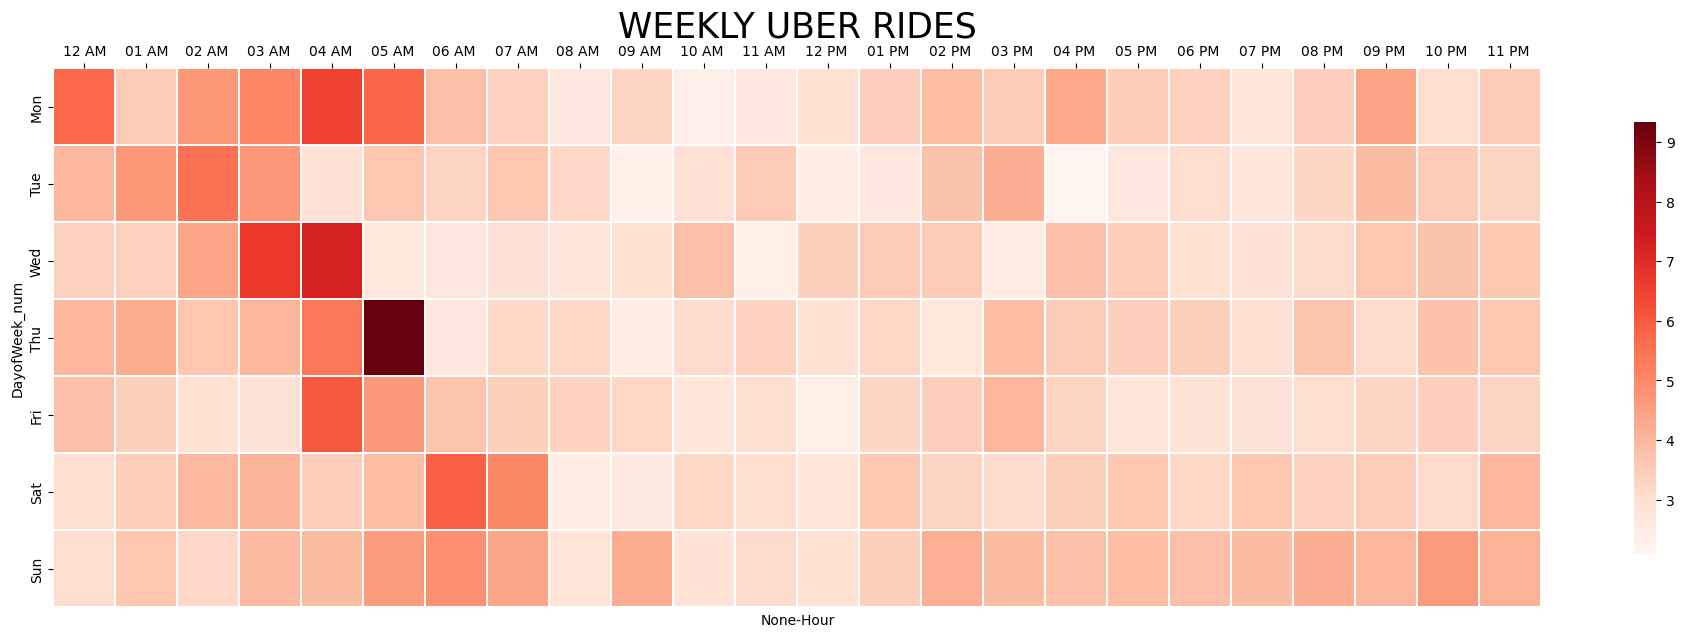

In [ ]:
fig, ax = plt.subplots(figsize=(24, 7))
sns.heatmap(df_h, cmap="Reds",
           linewidth=0.3, cbar_kws={"shrink": .8})

xticks_labels = ['12 AM', '01 AM', '02 AM ', '03 AM ', '04 AM ', '05 AM ', '06 AM ', '07 AM ', 
                 '08 AM ', '09 AM ', '10 AM ', '11 AM ', '12 PM ', '01 PM ', '02 PM ', '03 PM ',
                 '04 PM ', '05 PM ', '06 PM ', '07 PM ', '08 PM ', '09 PM ', '10 PM ', '11 PM ']

yticks_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xticks(np.arange(24) + .5, labels=xticks_labels)
plt.yticks(np.arange(7) + .5, labels=yticks_labels)

ax.xaxis.tick_top()

title = 'Weekly Uber Rides'.upper()
plt.title(title, fontdict={'fontsize': 25})

plt.show()

<ipython-input-27-6cd9c8773dba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_2['fare_amount'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


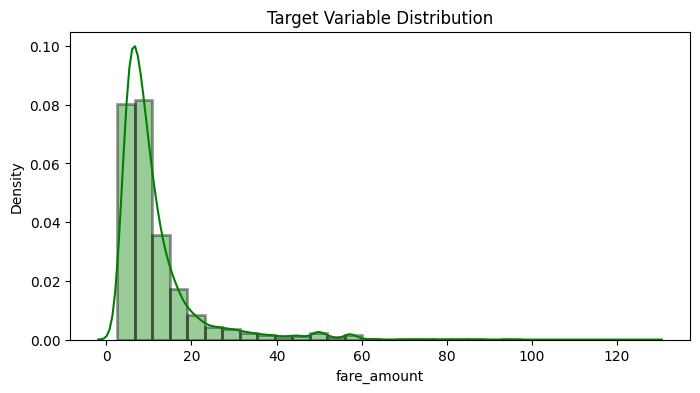

In [ ]:
plt.figure(figsize=[8,4])
sns.distplot(uber_2['fare_amount'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

In [ ]:
uber_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11414 entries, 0 to 11766
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        11414 non-null  float64            
 1   pickup_datetime    11414 non-null  datetime64[ns, UTC]
 2   pickup_longitude   11414 non-null  float64            
 3   pickup_latitude    11414 non-null  float64            
 4   dropoff_longitude  11414 non-null  float64            
 5   dropoff_latitude   11414 non-null  float64            
 6   passenger_count    11414 non-null  float64            
 7   Distance           11414 non-null  float64            
 8   Year               11414 non-null  int64              
 9   Month              11414 non-null  int64              
 10  Day                11414 non-null  int64              
 11  Day of Week        11414 non-null  object             
 12  DayofWeek_num      11414 non-null  int64      

In [ ]:
#uber_2.drop(['pickup_datetime','Day of Week','pickup','drop off'],axis=1)

In [ ]:
y=uber_2['fare_amount']
x=uber_2.drop(['fare_amount','pickup_datetime','Day of Week','pickup','drop off'],axis=1)

In [ ]:
uber_2.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,DayofWeek_num,Hour,counter
count,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.000000,11414.0
mean,11.346461,-73.898261,40.676894,-73.897350,40.677018,1.668828,3.381854,2011.757491,6.236201,15.602330,3.050990,13.461276,1.0
std,9.530364,2.923418,2.866171,2.923452,2.866153,1.290061,3.667361,1.864571,3.430056,8.687634,1.935441,6.519430,0.0
min,2.500000,-75.342904,-74.009697,-75.350437,-74.000408,0.000000,0.010000,2009.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,6.000000,-73.992217,40.736536,-73.991653,40.735073,1.000000,1.280000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.0
50%,8.500000,-73.981942,40.753210,-73.980401,40.753488,1.000000,2.180000,2012.000000,6.000000,15.000000,3.000000,14.000000,1.0
75%,12.500000,-73.968412,40.767607,-73.965407,40.768511,2.000000,3.960000,2013.000000,9.000000,23.000000,5.000000,19.000000,1.0
max,126.100000,40.770667,41.028748,40.765382,41.048048,6.000000,48.710000,2015.000000,12.000000,31.000000,6.000000,23.000000,1.0


In [ ]:
uber_2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day of Week,DayofWeek_num,Hour,counter,pickup,drop off
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,1.68,2015,5,7,Thu,3,19,1,"40.73835373,-73.99981689","40.72321701,-73.99951172"
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.46,2009,7,17,Fri,4,20,1,"40.728225,-73.994355","40.750325,-73.99471"
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,5.04,2009,8,24,Mon,0,21,1,"40.74077,-74.005043","40.772647,-73.962565"
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,1.66,2009,6,26,Fri,4,8,1,"40.790844,-73.976124","40.803349,-73.965316"
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,4.48,2014,8,28,Thu,3,17,1,"40.744085,-73.925023","40.761247,-73.973082"


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [ ]:
print(x_train.shape)#training data
print(y_train.shape)

(8560, 12)
(8560,)


In [ ]:
print(x_test.shape)#testing data
print(y_test.shape)

(2854, 12)
(2854,)


In [ ]:
from sklearn.linear_model import LinearRegression  #linear regression model
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
linear_pred=LR.predict(x_test)
linear_pred

array([13.65777581,  8.79270254, 14.26922057, ...,  9.6745251 ,
        8.09906335,  3.61210073])

In [ ]:
y_test

2622     12.1
8463      7.5
4723     12.0
2095      4.9
6166      6.1
         ... 
232       7.0
11635     5.0
6662      8.1
380       7.0
2697      6.1
Name: fare_amount, Length: 2854, dtype: float64

In [ ]:
df2=pd.DataFrame({'Actual values':y_test,'Predicted values':linear_pred})
df2

,Actual values,Predicted values
2622,12.1,13.657776
8463,7.5,8.792703
4723,12.0,14.269221
2095,4.9,7.217747
6166,6.1,5.351534
...,...,...
232,7.0,8.133309
11635,5.0,8.199487
6662,8.1,9.674525
380,7.0,8.099063


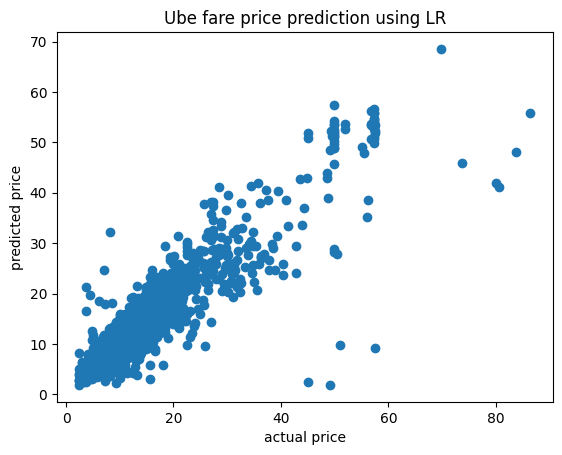

In [ ]:
plt.scatter(y_test,linear_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Ube fare price prediction using LR")
plt.show()

In [ ]:
from sklearn import metrics
linear_error=metrics.r2_score(y_test,linear_pred)
print(linear_error)


0.8415334001974107


In [ ]:
from sklearn.linear_model import Lasso  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [ ]:
lasso_pred=lasso.predict(x_test)

In [ ]:
lasso_error=metrics.r2_score(y_test,lasso_pred)
print(lasso_error)

0.8322244364203726


In [ ]:
df2=pd.DataFrame({'Actual values':y_test,'Predicted values':lasso_pred})
df2

,Actual values,Predicted values
2622,12.1,13.687296
8463,7.5,8.171717
4723,12.0,14.229411
2095,4.9,6.973983
6166,6.1,5.889023
...,...,...
232,7.0,7.154445
11635,5.0,7.403082
6662,8.1,9.844607
380,7.0,7.764857


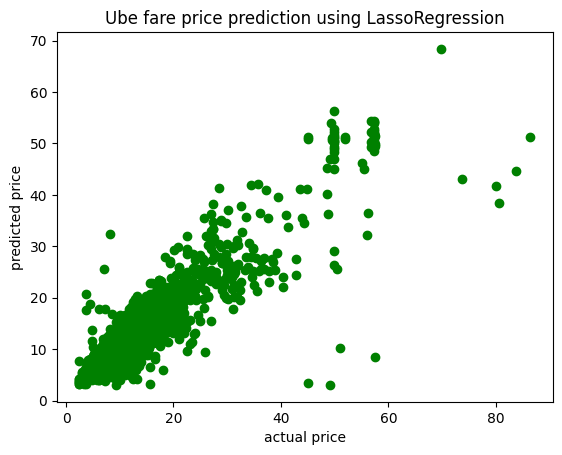

In [ ]:
plt.scatter(y_test,lasso_pred,color='green')
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Ube fare price prediction using LassoRegression")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
pickle.dump(LR,open("./model.sav",'wb'))